In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ! unzip "/content/drive/MyDrive/flowers.zip"

In [ ]:
h, w = 120, 120
path = "flowers"

In [ ]:
x = []
y = []
classes = {}

for i, folder in enumerate(os.listdir(path)):
    classes[i] = folder
    for img_name in tqdm(os.listdir(os.path.join(path, folder))):
        y.append(i)
        img_path = os.path.join(path, folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (h, w))
        x.append(img)

x = np.array(x)
y = np.array(y)

100%|██████████| 761/761 [00:00<00:00, 884.53it/s]


In [ ]:
x.shape, y.shape

((4258, 120, 120, 3), (4258,))

In [ ]:
classes

{0: 'rose', 1: 'sunflower', 2: 'tulip', 3: 'dandelion', 4: 'daisy'}

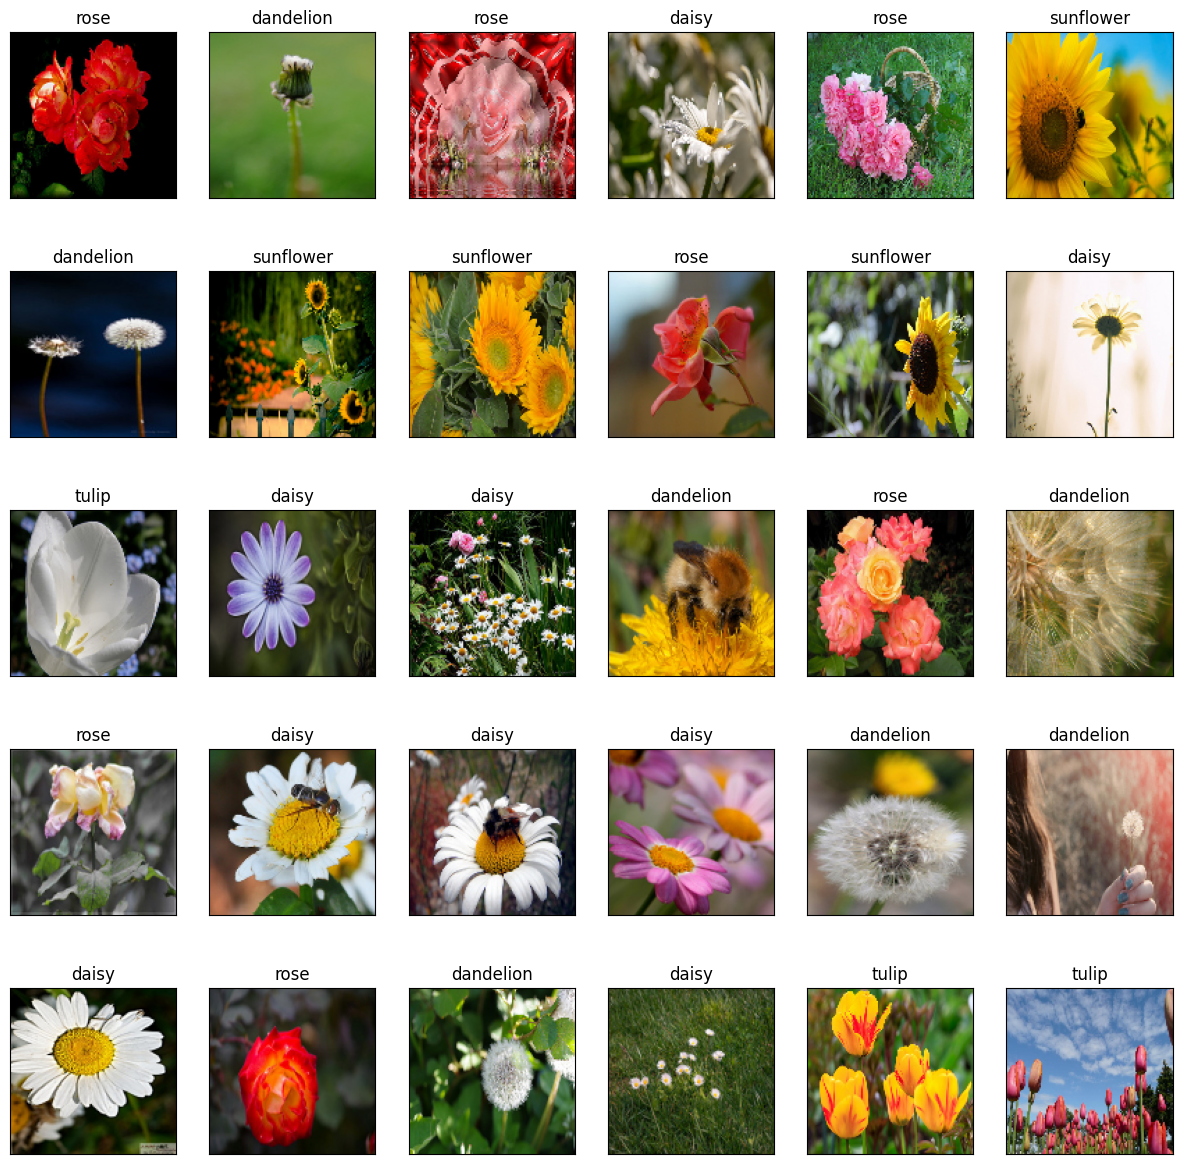

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    k = random.randint(0, len(y)-1)
    plt.imshow(x[k])
    plt.title(classes[y[k]])
    plt.xticks([])
    plt.yticks([])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

x_train = x_train / 255.
x_test = x_test / 255.

y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [ ]:
del model

model = tf.keras.Sequential([
    Input(shape=(h, w, 3)),

    Conv2D(32, 3, padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(32, 3, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D(2),


    Conv2D(64, 3, padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(64, 3, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D(2),

    Conv2D(128, 3, padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(128, 3, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D(2),

    Conv2D(256, 3, padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPool2D(2),

    Conv2D(512, 3, padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(512, 3, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D(2),

    Flatten(),

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(classes), activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 120, 120, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 120, 120, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 5,320,485 (20.30 MB)

 Trainable params: 5,316,581 (20.28 MB)

 Non-trainable params: 3,904 (15.25 KB)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0., nesterov=False),
              metrics=["accuracy"])

In [ ]:
hist = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=50, batch_size=16)

Epoch 1/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step - accuracy: 0.2385 - loss: 2.4003 - val_accuracy: 0.2465 - val_loss: 2.5710
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.3052 - loss: 2.0453 - val_accuracy: 0.3697 - val_loss: 1.5564
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3275 - loss: 1.8726 - val_accuracy: 0.5082 - val_loss: 1.1956
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3646 - loss: 1.7263 - val_accuracy: 0.5282 - val_loss: 1.1252
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3857 - loss: 1.6426 - val_accuracy: 0.5552 - val_loss: 1.1250
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.4117 - loss: 1.5568 - val_accuracy: 0.5376 - val_loss: 1.0855
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.4274 - loss: 1.5022 - val_accuracy: 0.5493 - val_loss: 1.0823
Epoch 8/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4223 - loss: 1.4588 - val_acc

In [ ]:
hist1 = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=50, batch_size=16)

Epoch 1/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7320 - loss: 0.7234 - val_accuracy: 0.7124 - val_loss: 0.7502
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7084 - loss: 0.7746 - val_accuracy: 0.7113 - val_loss: 0.7551
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7231 - loss: 0.7306 - val_accuracy: 0.7066 - val_loss: 0.7461
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7372 - loss: 0.7049 - val_accuracy: 0.7289 - val_loss: 0.7491
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7402 - loss: 0.7311 - val_accuracy: 0.6960 - val_loss: 0.7969
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7314 - loss: 0.7474 - val_accuracy: 0.7066 - val_loss: 0.7738
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7347 - loss: 0.7035 - val_accuracy: 0.7148 - val_loss: 0.7559
Epoch 8/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7501 - loss: 0.6935 - val_acc

Text(0.5, 1.0, 'Flowers loss: train VS val')

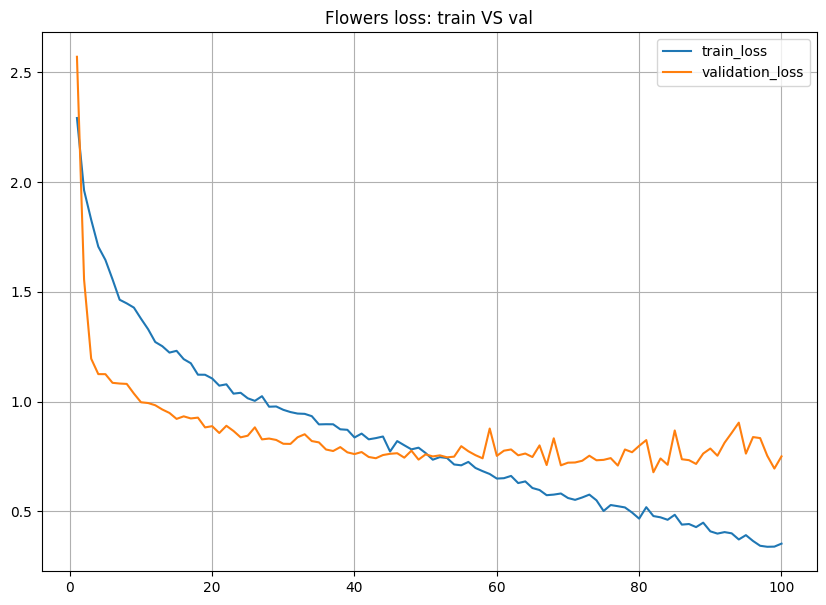

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 101), np.concatenate([hist.history["loss"], hist1.history["loss"]]), label="train_loss")
plt.plot(range(1, 101), np.concatenate([hist.history["val_loss"], hist1.history["val_loss"]]), label="validation_loss")
plt.legend()
plt.grid()
plt.title("Flowers loss: train VS val")

In [ ]:
import requests
from PIL import Image
from io import BytesIO

def predict_image_from_url(url, model, classes, h, w):
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an exception for HTTP errors

        img_data = response.content
        img = Image.open(BytesIO(img_data)).convert('RGB')
        img = img.resize((w, h))
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        predicted_class_name = classes[predicted_class_index]

        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class_name} (Confidence: {predictions[0][predicted_class_index]:.2f})")
        plt.axis('off')
        plt.show()

        return predicted_class_name, predictions[0][predicted_class_index]
    except requests.exceptions.RequestException as e:
        print(f"Error fetching image from URL: {e}")
        return None, None
    except Exception as e:
        print(f"An error occurred during image processing or prediction: {e}")
        return None, None

In [ ]:
classes

{0: 'rose', 1: 'sunflower', 2: 'tulip', 3: 'dandelion', 4: 'daisy'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


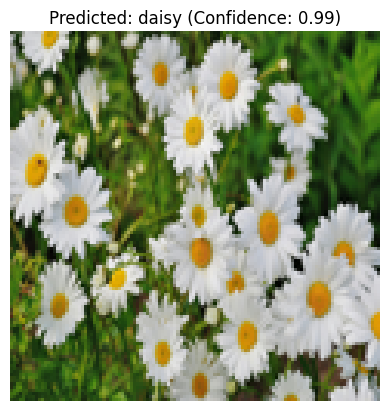

In [ ]:
image_url = "https://french-florist-web.imgix.net/ffv2/other/Original/pexels_pixabay_67857_1724700841286_2299.jpg"
predicted_class, confidence = predict_image_from_url(image_url, model, classes, h, w)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


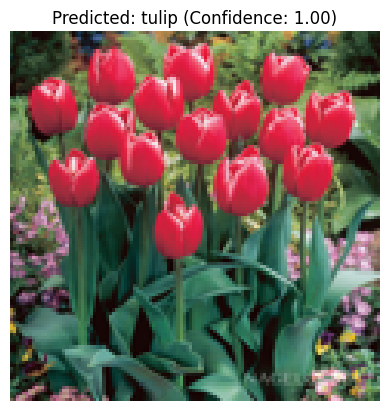

In [ ]:
image_url = "https://nagelglads.com/cdn/shop/files/70034_945-TL_WM_923396ae-7306-4349-be35-a1e0dbec44c3.jpg?v=1718162071"
predicted_class, confidence = predict_image_from_url(image_url, model, classes, h, w)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


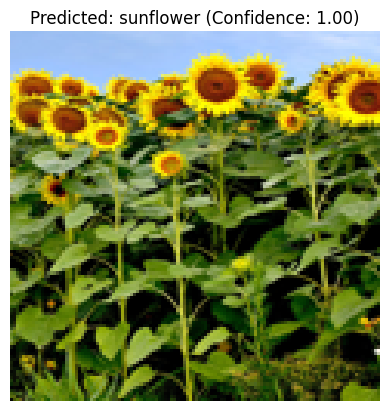

In [ ]:
image_url = "https://hips.hearstapps.com/hmg-prod/images/sunforest-mix-sunflower-types-1586794598.jpg?crop=0.9310225303292895xw:1xh;center,top"
predicted_class, confidence = predict_image_from_url(image_url, model, classes, h, w)